In [117]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pyplot
import numpy as np
import pylab as plb
from scipy import stats

In [120]:
%%R summarySE <- function(data=NULL, measurevar, groupvars=NULL, na.rm=FALSE,
                      conf.interval=.95, .drop=TRUE) {
  library(plyr)
  
  # New version of length which can handle NA's: if na.rm==T, don't count them
  length2 <- function (x, na.rm=FALSE) {
    if (na.rm) sum(!is.na(x))
    else       length(x)
  }
  
  # This does the summary. For each group's data frame, return a vector with
  # N, mean, and sd
  datac <- ddply(data, groupvars, .drop=.drop,
                 .fun = function(xx, col) {
                   c(N    = length2(xx[[col]], na.rm=na.rm),
                     mean = mean   (xx[[col]], na.rm=na.rm),
                     sd   = sd     (xx[[col]], na.rm=na.rm)
                   )
                 },
                 measurevar
  )
  
  # Rename the "mean" column    
  datac <- rename(datac, c("mean" = measurevar))
  
  datac$se <- datac$sd / sqrt(datac$N)  # Calculate standard error of the mean
  
  # Confidence interval multiplier for standard error
  # Calculate t-statistic for confidence interval: 
  # e.g., if conf.interval is .95, use .975 (above/below), and use df=N-1
  ciMult <- qt(conf.interval/2 + .5, datac$N-1)
  datac$ci <- datac$se * ciMult
  
  return(datac)
}

In [113]:
%load_ext rpy2.ipython

In [125]:
%R require(ggplot2)

array([1], dtype=int32)

In [112]:
%matplotlib inline

In [2]:
df = pd.read_excel('sequences_for_cm.xlsx')

In [4]:
grp = df.groupby(df['qseqid'])

In [6]:
pidentr_dict = {}

In [7]:
for name, data in grp:
    pident_r = data['pident'].max() - data['pident'].min()
    pidentr_dict[name] = pident_r

In [8]:
name_list = []
energy_list = []

In [9]:
with open('RNAalifold_results.txt', 'r') as f:
    for count, line in enumerate(f):
        if count == 0 or count % 3 == 0:
            name = line.split('/')[1].split('_seqs_')[0]
            name_list.append(name)
        if count == 2 or count % 3 == 2:
            energy = line.split('=')[0][-7:].strip()
            energy_list.append(energy)

In [11]:
edf = pd.DataFrame({'name': name_list, 'delta_G': energy_list})

In [ ]:
edf['pident_range'] = edf['name'].map(pidentr_dict)

In [16]:
edf

,delta_G,name,pident_range
0,-18.60,c0293_EC,0.000
1,-0.32,c0343_EC,25.333
2,-44.93,Esr1_EC,2.991
3,-53.16,Esr2_EC,3.191
4,-29.69,Esr4_EC,21.721
5,-41.24,Esr5_EC,7.692
6,-11.53,Esr6_EC,25.714
7,-38.38,Esr8_EC,17.931
8,-12.80,Esr9_EC,19.444
9,-23.29,eyeA_EC,2.667


In [18]:
edf[['delta_G']] = edf[['delta_G']].apply(pd.to_numeric)

In [82]:
x = edf['pident_range']
y = edf['delta_G']

y=0.713304x+(-34.465307)


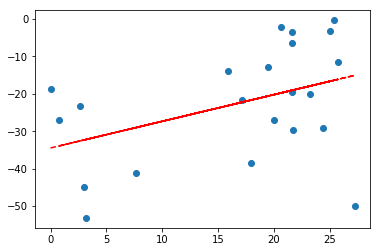

In [89]:
plt.scatter(x, y)
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x, p(x), "r--")
print("y=%.6fx+(%.6f)"%(z[0],z[1]))

In [93]:
m, b, r, p, se = stats.linregress(x, y)

In [96]:
print("r-squared:", r**2)

r-squared: 0.172406154287


In [20]:
cd pa_results/redo/

/Users/aug/workspace/bio/sRNA/ecoli/pa_results/redo


In [24]:
df = pd.read_excel('rfam_blast.xlsx', sheet=0)

In [25]:
df

,All Rfam results reflected in BLAST results?,# genomes marked present via Rfam but not via BLAST,All BLAST results reflected in Rfam results?,# genomes marked present via BLAST but not via Rfam,Existing or homemade CM?,total # NR rfam hits,total # NR BLAST hits,total unique hits,% reflected using BLAST alone,# more hits with cmsearch than Rfam
ffs_EC,True,0,True,0,RF00169,1100,1100,1100,1.000000,0
ryhB_EC_rf,True,0,True,0,RF00057,1100,1100,1100,1.000000,0
ssrA_EC,True,0,True,0,RF00023,1100,1100,1100,1.000000,0
ssrS_6S_EC_rf,True,0,True,0,RF00013,1100,1100,1100,1.000000,0
spf_EC,True,0,True,0,RF00021,1099,1099,1099,1.000000,0
Esr8_EC,True,0,True,0,0,1086,1086,1086,1.000000,0
Esr9_EC,True,0,True,0,0,929,929,929,1.000000,0
dsrA_EC,True,0,True,0,RF00014,915,915,915,1.000000,0
STnc3000_ST,True,0,True,0,0,912,912,912,1.000000,0
istR_EC_rf,True,0,True,0,RF01400,858,858,858,1.000000,0


In [26]:
edf.set_index('name', inplace=True)

In [28]:
edf.index.name = 'name'

In [97]:
df = df.rename(columns={'# more hits with cmsearch than Rfam': 'cmsearch_advantage', 'Existing or homemade CM?': 'cm'})

In [47]:
df.index.name = 'name'

In [99]:
def is_homemade(input):
    if input == 0:
        source = 'homemade'
    elif input.startswith('RF'):
        source = 'rfam'
    else:
        source = 'unknown'
    return source

In [100]:
df['source'] = df['cm'].apply(is_homemade)

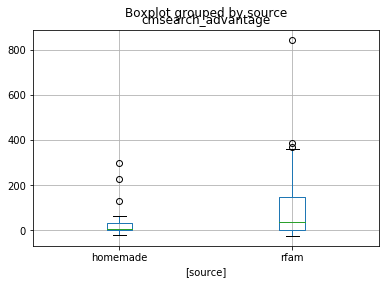

In [109]:
df[['cmsearch_advantage', 'source']].boxplot(by='source')

In [123]:
rdf = df[['cmsearch_advantage', 'source']] 

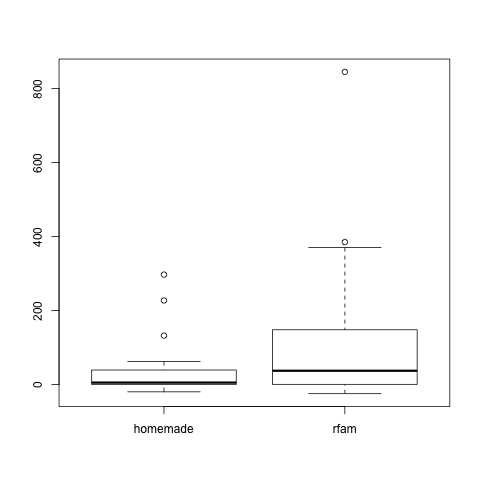

In [129]:
%%R -i rdf
boxplot(cmsearch_advantage ~ source, data = rdf)

In [135]:
%R rdf$source <- as.factor(rdf$source)

[rfam, rfam, rfam, rfam, rfam, ..., rfam, rfam, rfam, rfam, rfam]
Length: 80
Categories (2, object): [homemade, rfam]

In [136]:
%R kruskal.test(cmsearch_advantage ~ source, data=rdf)

statistic
5.440861
parameter
1
p.value
0.019671
method
'Kruskal-Wallis rank sum test'
data.name
'cmsearch_advantage by source'


In [53]:
edf = pd.merge(edf, df[['cmsearch_advantage']], how='left', left_index=True, right_index=True)

In [54]:
edf

,delta_G,pident_range,cmsearch_advantage
name,,,
c0293_EC,-18.60,0.000,0
c0343_EC,-0.32,25.333,-20
Esr1_EC,-44.93,2.991,62
Esr2_EC,-53.16,3.191,11
Esr4_EC,-29.69,21.721,227
Esr5_EC,-41.24,7.692,0
Esr6_EC,-11.53,25.714,132
Esr8_EC,-38.38,17.931,0
Esr9_EC,-12.80,19.444,0


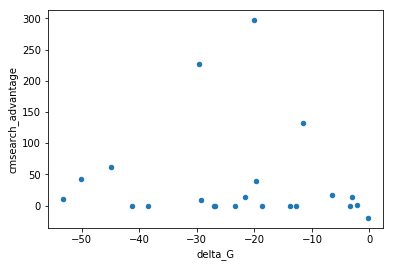

In [55]:
edf.plot(kind = 'scatter', x='delta_G', y='cmsearch_advantage')

Will need to repeat this once free energy for all structures is available